Step-1:
Define input array X with angles from 60 deg to 360 deg converted in radians.

In [63]:
import numpy as np


X_degree = np.arange(60, 361, 1)
X_rad = np.radians(X_degree)
X = X_rad.reshape(-1, 1)

X.shape


(301, 1)

Step-2: Compute Y as Y=[Sin(X)+Cos(X)] + K^2
where K is a random number generated from normal distribution with 0.5 mean and
0.15 std dev.

In [64]:
np.random.seed(42)
K = np.random.normal(loc=0.5, scale=0.15, size=X.shape[0])
Y = (np.sin(X.flatten()) + np.cos(X.flatten())) + K**2
Y = Y.reshape(-1, 1)

Step-3: Create Linear Regression model with SSE as error, and different Non-Linear
Regression models of 3, 13th and 15th degree polynomials on data created in step-1
and step-2. 

Step-4: Plot the created models for the power of 1, 3,13, 15, and print the SSE,
Coefficients for the plotted models, and print the prediction of test set on 15th Deg.
Polynomial model.


In [65]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


Degree:  1

SSE:  45.98024432537884
Coefficients : [[-0.         -0.17876241]]

Degree:  3

SSE:  2.4263173537544143
Coefficients : [[ 0.         -1.69352132 -0.02620191  0.03876815]]

Degree:  13

SSE:  1.3512976529277254
Coefficients : [[ 0.00000000e+00 -3.39615977e+00 -2.15734824e+00  1.34826605e+00
   2.41230269e+00 -8.85914319e-01 -2.29681474e+00  2.54204233e+00
  -1.23899741e+00  3.51687924e-01 -6.19250733e-02  6.68943864e-03
  -4.07368555e-04  1.07320829e-05]]

Degree:  15

SSE:  1.3234364499570912
Coefficients : [[ 0.00000000e+00 -1.38663424e-01 -2.21084184e-01 -1.95619088e-01
  -5.37174657e-02  1.10929088e-01  1.20185429e-01 -7.06405679e-02
  -1.26225992e-01  1.55545482e-01 -7.86059110e-02  2.26670430e-02
  -4.01508716e-03  4.33962691e-04 -2.63595065e-05  6.91462734e-07]]

Prediction on 15th degree model (test set):
[-1.09960868  1.08023923 -0.33418722 -0.89033583  0.64026733  1.54478646
 -0.71123122 -1.10512795 -1.12921458  1.17010513  1.60300148 -0.67524745
  0.95397985 -1.

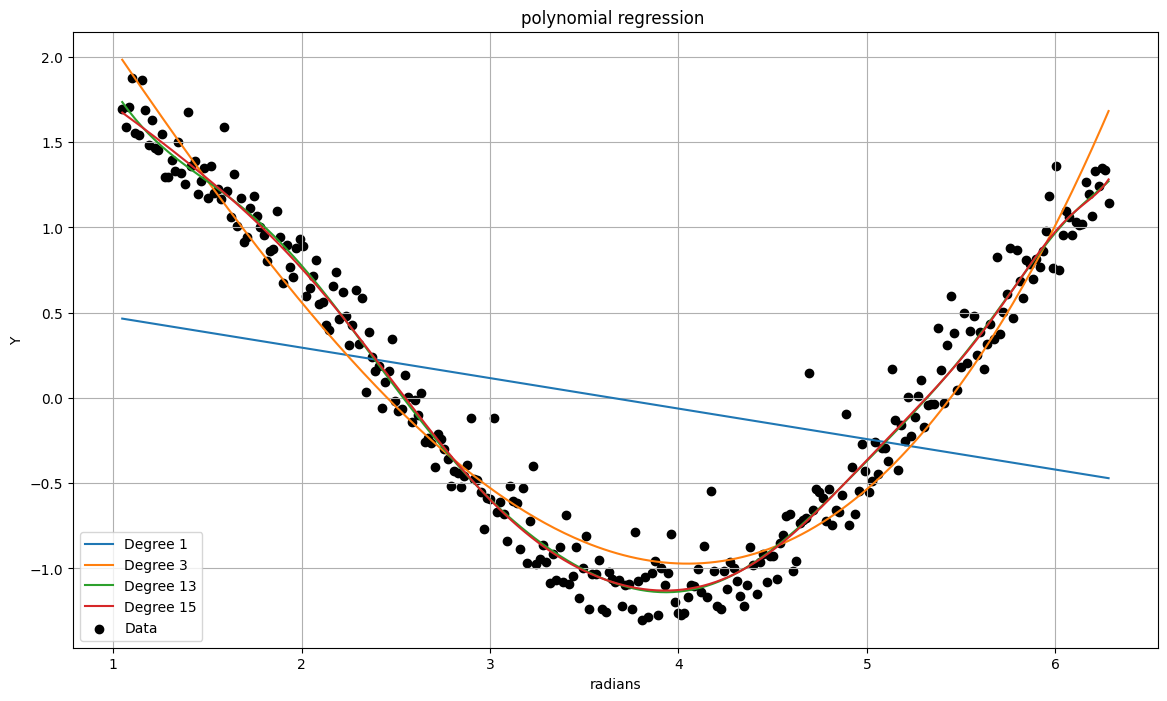

In [66]:
def model_fit(X_train, Y_train, X_test, Y_test, degree):
    poly = PolynomialFeatures(degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    
    model = LinearRegression()
    model.fit(X_train_poly, Y_train)
    Y_pred = model.predict(X_test_poly)
    sse = np.sum((Y_test - Y_pred)**2)
    
    return model, poly, sse, model.coef_


degrees = [1, 3, 13, 15]
models = {}

plt.figure(figsize=(14, 8))
X_plot = np.linspace(min(X.flatten()), max(X.flatten()), 300).reshape(-1, 1)



for degree in degrees:
    model, poly, sse, coefs = model_fit(X_train, Y_train, X_test, Y_test, degree)
    Y_plot = model.predict(poly.transform(X_plot))
    
    plt.plot(X_plot, Y_plot, label=f'Degree {degree}')
    models[degree] = {
        'model': model,
        'poly': poly,
        'sse': sse,
        'coefs': coefs
    }
    print('\nDegree: ',degree)
    print('\nSSE: ',sse)
    print('Coefficients :',coefs)


pred_15 = models[15]['model'].predict(models[15]['poly'].transform(X_test))
print('\nPrediction on 15th degree model (test set):')
print(pred_15.flatten())

plt.scatter(X, Y, color='black', label='Data')
plt.legend()
plt.title('polynomial regression ')
plt.xlabel('radians')
plt.ylabel('Y')
plt.grid(True)
plt.show()



Step-5: Add the L2 regularization to the nonlinear regression model with 15th degree
polynomial created in Step 3. (Optimize for Max. of 50 Iterations and lambda values
[1e-10 and 1e-5])

Step-6: Plot the Ridge (L2) regression models for lambda values [1e-10 and 1e-5] and
print the SSE, Coefficients for the plotted models, and print the prediction of test set
on 15th Deg. Polynomial model.


 ridge regression : 1e-10

 SSE:  5626.536727255667

 coefficients:  [ 0.00000000e+00  8.71236274e+02 -1.45037417e+03  1.00158354e+03
  2.31240634e+02 -1.08669849e+03  1.07477828e+03 -6.30654153e+02
  2.52973921e+02 -7.26882904e+01  1.51735965e+01 -2.28858307e+00
  2.43360141e-01 -1.73189164e-02  7.40542539e-04 -1.43867151e-05]

 prediction on test set:
 [-1.11285494  1.09964192 -0.35070181 -0.8896116   0.64148064  1.57307189
 -0.70963403 -1.1200337  -1.14675211  1.18783032  1.66927935 -0.67431172
  0.98487488 -1.13196718 -0.31153691  0.96478188 -0.80839208 -0.28588063
 -1.13589757 -0.37487541 -1.14492093  0.53678071 -0.10940504  1.29525841
 -1.05230657  0.01985657  0.13398456  0.30574554 -0.54180582 -0.52180317
 -0.98263129  0.9263283  -1.1460574   1.04218865  1.41228136  0.51051247
  0.22799646 -0.12237465  1.30858148  0.71600012 -0.17002951  0.20221351
  1.12345659 -1.14607876  1.62064266 -1.01464657  0.85000741  0.1765146
  0.06475746 -0.33115703 -0.42821914 -0.43928069  0.5652486

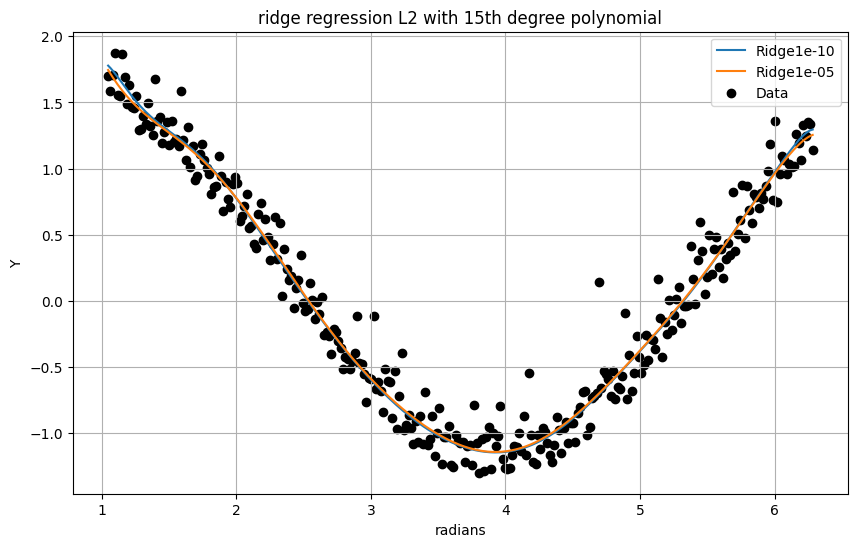

In [67]:

lambdas = [1e-10, 1e-5]
degree = 15


plt.figure(figsize=(10, 6))
for lam in lambdas:
    poly = PolynomialFeatures(degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    X_plot_poly = poly.transform(X_plot)

    ridge_model = Ridge(alpha=lam, max_iter=50)
    ridge_model.fit(X_train_poly, Y_train)
    Y_plot_ridge = ridge_model.predict(X_plot_poly)
    
    sse_ridge = np.sum((Y_test - ridge_model.predict(X_test_poly))**2)
    
    plt.plot(X_plot, Y_plot_ridge, label=f'Ridge{lam}')
    print('\n ridge regression :',lam)
    print('\n SSE: ',sse_ridge)
    print('\n coefficients: ',ridge_model.coef_)
    print('\n prediction on test set:\n',ridge_model.predict(X_test_poly).flatten())


plt.scatter(X, Y, color='black', label='Data')
plt.legend()
plt.title('ridge regression L2 with 15th degree polynomial')

plt.xlabel('radians')
plt.ylabel('Y')
plt.grid(True)
plt.show()
